Student Details

Name:Michel Danjou

ID:18263461

Etivity 4

All necessary imports are provided. Please do not add further imports.

In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

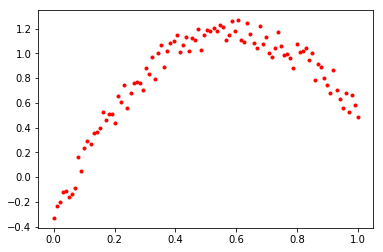

In [3]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [4]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [5]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [6]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [7]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [8]:
ein=[]
eout=[]
weights=[]

lambdas = np.linspace(0,1,1000)
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Task 4.1 
  * Using the above code, find the optimum regularization parameter, l. 
    * In order to do so, you will need to decide on a suitable list of l values. 
    * Pick at most 1000 values! 
    * Once you have found the optimal l, compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

#### Rubric
  * Beginning: Partial implementation without valid results.
  * Developing: Partial implementation with partial results.
  * Accomplished: Correct results including plots. The chosen lambdas may not cover the range [0,1] appropriately and plots may not show very clear examples of over/underfitting.
  * Exemplary: Correct results, suitable range of <=1000 lambdas, plots clearly showing under+overfitting.

Text(0.5,1,'Ein and Eout for lambda > 0')

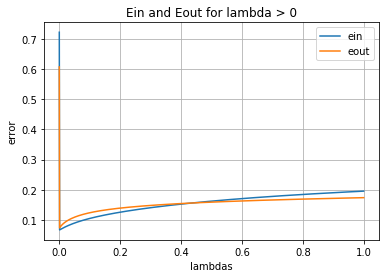

In [9]:
# plot ein, eout for lambda > 0
plt.plot(lambdas[:],ein[:], label='ein')
plt.plot(lambdas[:],eout[:], label='eout')


plt.xlabel("lambdas")
plt.ylabel("error")
plt.legend(loc='best')
plt.grid(True)
plt.title("Ein and Eout for lambda > 0")


### Observations:
The graph is showing both Ein and Eout. 

We can clearly see that:
  * Eout is high when lambda is 0, which corresponds to no regularization. 
  * Eout drops dramatically with a small value of lambda.
  * Both Eout and Ein start to increase as lambda grows.


In [10]:
lowest_eout_index = np.argmin(eout)
best_lambda = lambdas[lowest_eout_index]

print("lowest_eout_index          :", lowest_eout_index)
print("Best lambda used           :", best_lambda)
print("Eout without regularization:", eout[0])
print("Eout with regularization   :", eout[lowest_eout_index])
print("Difference                 :", eout[0] - eout[lowest_eout_index])

lowest_eout_index          : 1
Best lambda used           : 0.001001001001001001
Eout without regularization: 0.6068194883258673
Eout with regularization   : 0.07395636692775112
Difference                 : 0.5328631213981162


We notice a massive improvement for Eout after applying regularisation. I have ran this experiment multiple times and, although the results vary, we can see up to a 10 fold improvement on occasion.

# Task 4.2 Provide the following plots:

  * A plot showing the estimate of Eout vs l on the domain [0,1]
  * A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. 
  
In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

#### Rubric
See task 4.1 above

Text(0.5,1,'Eout by lambda (where lambda> 0)')

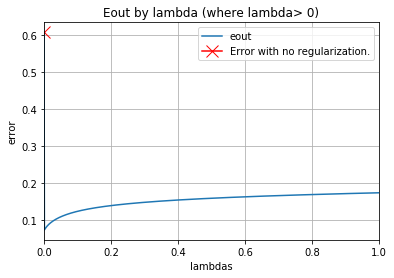

In [11]:
plt.plot(lambdas, eout, label='eout')
plt.plot(lambdas[0], eout[0], marker='x', color='red',  markersize=12, label="Error with no regularization.")
plt.xlim(0,1)
plt.xlabel("lambdas")
plt.ylabel("error")
plt.legend(loc='best')
plt.grid(True)

plt.title("Eout by lambda (where lambda> 0)")


#### Observations
We can see that Eout is very high when lambda is 0, which is expected as it means there is no regularisation. The value of Eout(lambda=0) is represented with a <span style="color:red">red cross </span> on the above graph which can be seen on the top left part of the plot.

We can see an important improvement of Eout as soon as lambda starts to grow over 0. 
Eout then slowly increases as lambda grows.


In [12]:
def calc_polynom(weights, X):
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 

C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


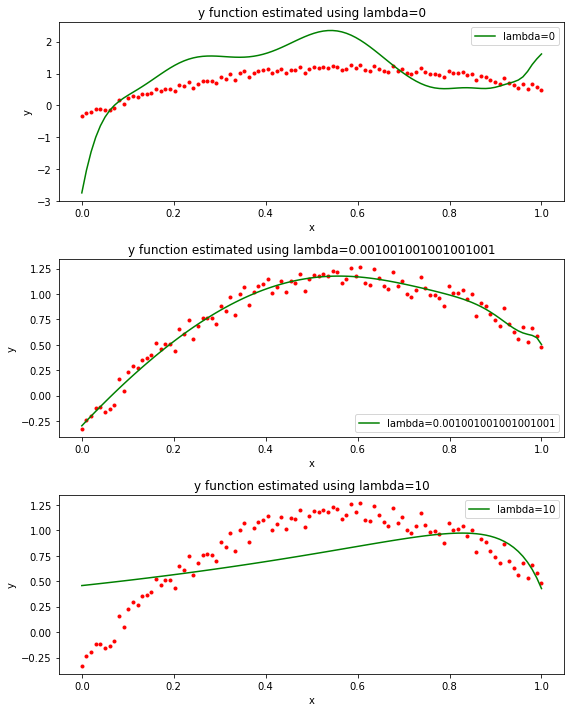

In [13]:
lambdas = np.linspace(0,1,1000)

def experiment(order, l):

    # random_state fixed to get reproducible (and 'good'! :-)) results
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)

    weights = weights_reg(X_train,y_train,l)
    ein = calc_error(weights, X_train,y_train)
    eout = calc_error(weights, X_test,y_test)
    
    return ein, eout, weights

plt.figure(figsize=(8, 10)) 
    
ls = [0, best_lambda, 10]
for i in range(1,4):
    subplt = int(str(31)+str(i))
    
    plt.subplot(subplt)
    ein, eout, weights = experiment(50, ls[i-1])
    pred = calc_polynom(weights, X)
        
    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = 'lambda=' + str(ls[i-1])
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()



In [14]:
print("best lambda: ", best_lambda)

best lambda:  0.001001001001001001


### Observations

We can see that:
  * for lambda =0, we have no regularization and hence the polynomial is oscillating around the target function. The target approximation is poor.
  * for the optimum lambda, the polynomial estimates the target function very accurately
  * for a very high lambda, the polynomial is more or less flat and poorly approximates the target function.


# Task 5
  * Use the code from Task 4 and perform the same analysis using 10-fold cross-validation. 
  * Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. 
  * Note that the data set provided is ordered by increasing X.
  
#### Rubric
  * Beginning: Partial implementation without valid results.
  * Developing: Partial implementation with partial results.
  * Accomplished: Full implementation of 10-fold CV yielding valid lambda and Eout.
  * Exemplary: Full implementation of 10-fold CV yielding valid lamda, Eout and plots of over/under/optimal fitting.  

#### Implementation inspired by "Learning from Data" by Prof. Yaser S. Abu-Mostafa, p149, and  a review of Chelliah Kanthanathan's code.

#### Algorithm implemented:

Iterate over a large selection of lambda values between 0 and 1. 

For each lambda:
  * perform K-Fold cross validation.
  * Calculate Eout.
  * Keep the average Eout
  
Once all the lambdas are processed:
  * Find the lowest Eout and its corresponding lambda. This is the best lambda.
  * Calculate K-Fold once more to find the weights associated with the best lambda.
  
Plot the curve using the weight associated with the best lambda.  

In [15]:

lambdas = np.linspace(0,1,1000)

def get_eval(order, l):
    ein=[]
    eout=[]
    weights=[]
    
    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]

        w = weights_reg(X_train,y_train,l)
        weights.append(w)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
    
    Eval = np.mean(eout)
    print("Lambda:{} Eval: {}".format(l, Eval))
    return Eval


def experiment(order, l):
    ein=[]
    eout=[]
    weights=[]
    
    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]

        w = weights_reg(X_train,y_train,l)
        weights.append(w)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
    
    # Validation. Find the lowest Eout and best lambda
    lowest_eout_index = np.argmin(eout)
    best_lambda = lambdas[lowest_eout_index]

    return ein[lowest_eout_index], eout[lowest_eout_index], weights[lowest_eout_index]
    


all_eval = []

for l in lambdas:
    my_eval = get_eval(50, l)
    all_eval.append(my_eval)

# Validation. Find the Eval and best lambda
lowest_eout_index = np.argmin(all_eval)
best_lambda = lambdas[lowest_eout_index]
print("\nlowest_eout_index:{} best_lambda:{}".format(lowest_eout_index, best_lambda))




Lambda:0.0 Eval: 3.7916866620165566
Lambda:0.001001001001001001 Eval: 0.07294621621220428
Lambda:0.002002002002002002 Eval: 0.07439142322819461
Lambda:0.003003003003003003 Eval: 0.07557666965817876
Lambda:0.004004004004004004 Eval: 0.0766126730124091
Lambda:0.005005005005005005 Eval: 0.07753692268020132
Lambda:0.006006006006006006 Eval: 0.07837167376621457
Lambda:0.007007007007007007 Eval: 0.07913325227474369
Lambda:0.008008008008008008 Eval: 0.07983449813108054
Lambda:0.009009009009009009 Eval: 0.08048574816748252
Lambda:0.01001001001001001 Eval: 0.08109539959319846
Lambda:0.011011011011011011 Eval: 0.08167030526005646
Lambda:0.012012012012012012 Eval: 0.08221607559498716
Lambda:0.013013013013013013 Eval: 0.08273731653967017
Lambda:0.014014014014014014 Eval: 0.0832378191728857
Lambda:0.015015015015015015 Eval: 0.08372071153514403
Lambda:0.016016016016016016 Eval: 0.08418858054229601
Lambda:0.017017017017017015 Eval: 0.08464357014292044
Lambda:0.018018018018018018 Eval: 0.0850874605767

Lambda:0.15815815815815815 Eval: 0.12321231786379287
Lambda:0.15915915915915915 Eval: 0.12339789600991342
Lambda:0.16016016016016016 Eval: 0.12358280197315444
Lambda:0.16116116116116116 Eval: 0.12376704223049081
Lambda:0.16216216216216217 Eval: 0.12395062315236086
Lambda:0.16316316316316315 Eval: 0.12413355100455511
Lambda:0.16416416416416416 Eval: 0.12431583195008442
Lambda:0.16516516516516516 Eval: 0.12449747205101014
Lambda:0.16616616616616617 Eval: 0.1246784772702629
Lambda:0.16716716716716717 Eval: 0.12485885347342077
Lambda:0.16816816816816815 Eval: 0.125038606430472
Lambda:0.16916916916916916 Eval: 0.12521774181754247
Lambda:0.17017017017017017 Eval: 0.1253962652186022
Lambda:0.17117117117117117 Eval: 0.12557418212714372
Lambda:0.17217217217217218 Eval: 0.12575149794782842
Lambda:0.17317317317317318 Eval: 0.1259282179981228
Lambda:0.17417417417417416 Eval: 0.12610434750989202
Lambda:0.17517517517517517 Eval: 0.12627989163096834
Lambda:0.17617617617617617 Eval: 0.1264548554267105

Lambda:0.3363363363363363 Eval: 0.14909924617668954
Lambda:0.33733733733733734 Eval: 0.14921555159715225
Lambda:0.3383383383383383 Eval: 0.14933161021323346
Lambda:0.33933933933933935 Eval: 0.149447422890144
Lambda:0.34034034034034033 Eval: 0.14956299048800892
Lambda:0.34134134134134136 Eval: 0.14967831386193403
Lambda:0.34234234234234234 Eval: 0.14979339386206192
Lambda:0.3433433433433433 Eval: 0.14990823133362882
Lambda:0.34434434434434436 Eval: 0.15002282711702922
Lambda:0.34534534534534533 Eval: 0.1501371820478698
Lambda:0.34634634634634637 Eval: 0.15025129695702527
Lambda:0.34734734734734735 Eval: 0.1503651726706933
Lambda:0.3483483483483483 Eval: 0.1504788100104495
Lambda:0.34934934934934936 Eval: 0.1505922097932998
Lambda:0.35035035035035034 Eval: 0.15070537283173344
Lambda:0.35135135135135137 Eval: 0.150818299933773
Lambda:0.35235235235235235 Eval: 0.1509309919030239
Lambda:0.3533533533533533 Eval: 0.15104344953872711
Lambda:0.35435435435435436 Eval: 0.15115567363580198
Lambda:

Lambda:0.5005005005005005 Eval: 0.16538957481894934
Lambda:0.5015015015015015 Eval: 0.16547441330794457
Lambda:0.5025025025025025 Eval: 0.16555910395399548
Lambda:0.5035035035035035 Eval: 0.1656436471832214
Lambda:0.5045045045045045 Eval: 0.16572804342021508
Lambda:0.5055055055055055 Eval: 0.16581229308804715
Lambda:0.5065065065065065 Eval: 0.1658963966082711
Lambda:0.5075075075075075 Eval: 0.1659803544009326
Lambda:0.5085085085085085 Eval: 0.16606416688457612
Lambda:0.5095095095095095 Eval: 0.16614783447625048
Lambda:0.5105105105105106 Eval: 0.1662313575915157
Lambda:0.5115115115115115 Eval: 0.16631473664445018
Lambda:0.5125125125125125 Eval: 0.16639797204765916
Lambda:0.5135135135135135 Eval: 0.1664810642122765
Lambda:0.5145145145145145 Eval: 0.16656401354797462
Lambda:0.5155155155155156 Eval: 0.16664682046297113
Lambda:0.5165165165165165 Eval: 0.1667294853640338
Lambda:0.5175175175175175 Eval: 0.166812008656487
Lambda:0.5185185185185185 Eval: 0.16689439074421938
Lambda:0.51951951951

Lambda:0.6756756756756757 Eval: 0.17830931665859834
Lambda:0.6766766766766766 Eval: 0.1783736410520495
Lambda:0.6776776776776777 Eval: 0.17843787363723598
Lambda:0.6786786786786787 Eval: 0.17850201464931598
Lambda:0.6796796796796797 Eval: 0.17856606432268637
Lambda:0.6806806806806807 Eval: 0.17863002289098678
Lambda:0.6816816816816816 Eval: 0.17869389058709936
Lambda:0.6826826826826827 Eval: 0.1787576676431557
Lambda:0.6836836836836837 Eval: 0.17882135429053556
Lambda:0.6846846846846847 Eval: 0.17888495075987296
Lambda:0.6856856856856857 Eval: 0.1789484572810564
Lambda:0.6866866866866866 Eval: 0.17901187408323366
Lambda:0.6876876876876877 Eval: 0.17907520139481364
Lambda:0.6886886886886887 Eval: 0.1791384394434681
Lambda:0.6896896896896897 Eval: 0.1792015884561367
Lambda:0.6906906906906907 Eval: 0.17926464865902764
Lambda:0.6916916916916916 Eval: 0.17932762027762092
Lambda:0.6926926926926927 Eval: 0.17939050353667246
Lambda:0.6936936936936937 Eval: 0.1794532986602138
Lambda:0.694694694

Lambda:0.8548548548548548 Eval: 0.18855399306808898
Lambda:0.8558558558558559 Eval: 0.18860501674201893
Lambda:0.8568568568568569 Eval: 0.18865598081866236
Lambda:0.8578578578578578 Eval: 0.1887068854329009
Lambda:0.8588588588588588 Eval: 0.18875773071921734
Lambda:0.8598598598598598 Eval: 0.18880851681169555
Lambda:0.8608608608608609 Eval: 0.18885924384402125
Lambda:0.8618618618618619 Eval: 0.18890991194948736
Lambda:0.8628628628628628 Eval: 0.18896052126098886
Lambda:0.8638638638638638 Eval: 0.18901107191102973
Lambda:0.8648648648648649 Eval: 0.18906156403172197
Lambda:0.8658658658658659 Eval: 0.18911199775478787
Lambda:0.8668668668668669 Eval: 0.1891623732115589
Lambda:0.8678678678678678 Eval: 0.1892126905329812
Lambda:0.8688688688688688 Eval: 0.18926294984961312
Lambda:0.8698698698698699 Eval: 0.18931315129162823
Lambda:0.8708708708708709 Eval: 0.1893632949888176
Lambda:0.8718718718718719 Eval: 0.18941338107058914
Lambda:0.8728728728728729 Eval: 0.18946340966596967
Lambda:0.8738738

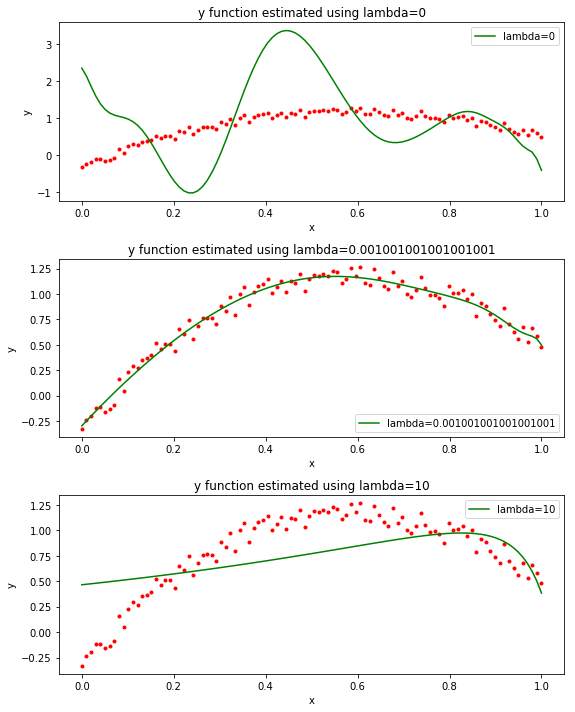

In [16]:

plt.figure(figsize=(8, 10)) 
    
ls = [0, best_lambda, 10]
best_weights = []

for i in range(1,4):
    subplt = int(str(31)+str(i))
    
    plt.subplot(subplt)
    ein, eout, weights = experiment(50, ls[i-1])
    pred = calc_polynom(weights, X)
        
    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = 'lambda=' + str(ls[i-1])
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()

    # keep the weights for 'best_lambda' so that we can analyse them later on.
    if(i==2):
        best_weights = weights
        
plt.show()


In [17]:
print("best_weights:", best_weights)

best_weights: [-2.96395194e-01  4.83114133e+00 -2.83518237e+00 -1.78804262e+00
 -6.66740741e-01 -2.71029793e-03  3.88884480e-01  5.89096465e-01
  6.37425065e-01  5.72598729e-01  4.35133204e-01  2.61734777e-01
  8.15099149e-02 -8.50239136e-02 -2.25165649e-01 -3.32504294e-01
 -4.05260837e-01 -4.44804885e-01 -4.54458630e-01 -4.38598362e-01
 -4.02017596e-01 -3.49500692e-01 -2.85556097e-01 -2.14265171e-01
 -1.39211275e-01 -6.34622371e-02  1.04135124e-02  8.03110900e-02
  1.44543176e-01  2.01790257e-01  2.51051129e-01  2.91596081e-01
  3.22924085e-01  3.44724562e-01  3.56843846e-01  3.59256180e-01
  3.52038907e-01  3.35351444e-01  3.09417609e-01  2.74510864e-01
  2.30942070e-01  1.79049389e-01  1.19190006e-01  5.17333780e-02
 -2.29442390e-02 -1.04464192e-01 -1.92448952e-01 -2.86524899e-01
 -3.86324513e-01 -4.91488058e-01 -6.01664876e-01]


In [18]:
print("best_lambda:{}".format(best_lambda))

best_lambda:0.001001001001001001


### Observations

We can see that:
  * for lambda =0, we have no regularization and hence the polynomial is oscillating around the target function. The target approximation is poor.
  * for the optimum lambda, the polynomial estimates the target function trend very accurately
  * for a very high lambda, the polynomial is more or less flat and poorly approximates the target function.


### Possible algorithm improvement 
Please note that we should **hold back** a portion of the data set and use it to only **evaluate the final model**, which would provide an **unbiased evaluation of Eout**.  

So in terms of algorithm we should consider doing this: 

  * Split the data set between training set  and testing set (80/20 rule) 
  * Run the KFold on the training set to find the best lambda 
  * Once we have the best lambda and associated weights, we calculate Eout on the testing set that we had saved at step 1. 

More information regarding holding out a portion of the data set for evaluating the final model: https://machinelearningmastery.com/difference-test-validation-datasets/

# Task 6 (CE6002)
  * Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).

  * Observe the resulting Eout, and l compare these to previous results. 
    * What do you see? 
    * Is this what you expected?
  * Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

#### Rubric
  * Beginning: Incorrect use of LassoCV and Ridge CV.
  * Developing: Incorrect use of LassCV or RidgeCV.
  * Accomplished: LassoCV and RidgeCV used correctly. Valid commentary on difference in lambda obtained in Task 1,2.
  * Exemplary: Correct use of Lasso&RidgeCV. Valid commentary on lambda including insights in the differences with Task 1,2 relating to the ability to approximate Eout correctly.

References: 
  * https://scikit-learn.org/stable/auto_examples/cluster/plot_feature_agglomeration_vs_univariate_selection.html#sphx-glr-auto-examples-cluster-plot-feature-agglomeration-vs-univariate-selection-py
  * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
  * https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b 
    * Describes how RidgeVC and LassoCV perform better at reducting over-fitting compared to simple Linear regression. 

What is the difference between Ridge and RidgeCV?
  * https://stats.stackexchange.com/questions/262640/the-results-of-cv-on-ridge-are-different-than-the-results-of-ridgecv

In [19]:
def alternate_regression(title, clf):
    score = clf.score(X_trans, y) 
    pred = clf.predict(X_trans)
    params = clf.get_params
    lambdas = clf.alpha_ 
    coeffs = clf.coef_

    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = title
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    print("score  :", score)
    print("params :", params)
    print("lambdas:", lambdas)
    print("coefs  :", coeffs)

## Ridge

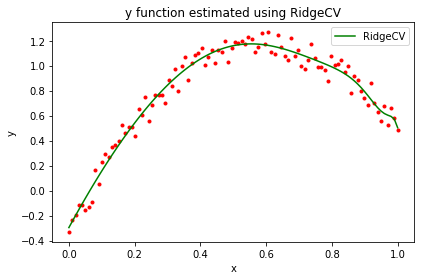

score  : 0.9709407168570137
params : <bound method BaseEstimator.get_params of RidgeCV(alphas=array([0.001, 0.002, ..., 0.999, 1.   ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)>
lambdas: 0.001001001001001001
coefs  : [ 0.          4.83241968 -2.84643082 -1.78166972 -0.65624508  0.00931168
  0.4055716   0.61168994  0.66331191  0.59662955  0.45168039  0.26628113
  0.07146935 -0.11013978 -0.26400482 -0.38234217 -0.46252364 -0.50555385
 -0.51478749 -0.49492816 -0.4512924  -0.38929754 -0.31412639 -0.23052498
 -0.14269629 -0.05426047  0.03174086  0.11281288  0.18696008  0.2526314
  0.30866332  0.35422445  0.3887638   0.41196376  0.42369832  0.42399655
  0.41301112  0.39099156  0.35826159  0.31520038  0.26222687  0.19978707
  0.12834366  0.04836768 -0.03966811 -0.13529444 -0.2380495  -0.34748207
 -0.46315369 -0.58464034 -0.71153351]


In [20]:
clf = RidgeCV(alphas=lambdas[1:]).fit(X_trans, y)

alternate_regression("RidgeCV", clf)

## Lasso

C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


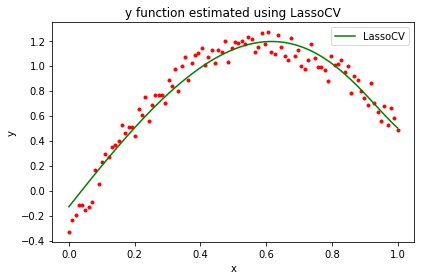

score  : 0.9483518419499535
params : <bound method BaseEstimator.get_params of LassoCV(alphas=array([0.   , 0.001, ..., 0.999, 1.   ]), copy_X=True, cv=10,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=0,
    selection='cyclic', tol=0.0001, verbose=False)>
lambdas: 0.001001001001001001
coefs  : [ 0.00000000e+00  3.34270698e+00 -3.93420916e-01 -2.50984709e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.77935038e-03  9.09688040e-02  8.43861107e-02  1.40493057e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00

In [21]:
clf = LassoCV(alphas=lambdas, cv=10, random_state=0).fit(X_trans, y)

alternate_regression("LassoCV", clf)

## Analysis

Reference: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

Lasso and Ridge are 2 different regularisers:

##### Ridge:
Ridge performs L2 regularization which adds a penalty equivalent to square of the magnitude of coefficients. L2 regularization has the effect of shrinking the weights which helps to reduce the model complexity. This can be clearly seen by the output of the coef_ parameters.

Ridge selected the following optimum lambda: **0.001001001001001001**.

##### Lasso:
Performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.
Lasso pushes a large number of weights to zero which results in simpler models. This can be clearly seen by the output of the coef_ parameters.

Lasso found the following optimum lambda: **0.001001001001001001**.

#### Ridge & Lasso compared to our own implementation
Here is what we notice when comparing the 3 regularization approaches:
  * The weights generated by our own algorithm are similar in value to the ones generated by Ridge's.
  * Ridge, Lasso, and our own algorithm, generally find **different values for lambda**, but on occasion, like here, they are **identical**.
  * Lambda is generally very small.

